# Desafio 1.

# Análise descritiva dos dados (EDA)

1. Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas;

2. Mostre-nos um caminho para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê.

3. Em cada problema descreva quais outras técnicas poderiam ser aplicadas e porquê você não as escolheu.

* Utilize os dados: eda_receitas_data.zip

#### Bibliotecas que vamos precisar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
db = pd.read_json('receitas.json')

In [3]:
db.sample(3) #Data e rating / categoria e rating / categories = [] pode significar ou que não existem as tags para aquele prato, ou escreveram um " " (espaço) no nome

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
5331,[Blend all ingredients in blender until smooth...,68.0,2004-08-20 04:00:00+00:00,"[Salad, Blender, Fruit, Leafy Green, Side, Cin...",805.0,"Spicy and sweet, this unusual salad would be i...",8.0,4.375,Fiesta Tortilla Salad,"[1 small mango, peeled, pitted, diced, 1/2 cup...",33.0
14576,[Preheat oven to 375°F. Wrap beets in aluminum...,14.0,2004-08-20 04:00:00+00:00,"[Salad, Leafy Green, Herb, Mustard, Vegetable,...",175.0,Dill and arugula complement this lovely salad.,3.0,4.375,Roasted Beet and Sugar Snap Pea Salad,"[3 medium beets, trimmed, 1/2 pound sugar snap...",93.0
1744,[Stir first 6 ingredients in heavy large sauce...,0.0,2004-08-20 04:00:00+00:00,"[Condiment/Spread, Sauce, Ginger, Quick & Easy...",226.0,This recipe is an accompaniment for Baked Ham ...,2.0,4.375,Rhubarb Chutney,"[1 cup plus 2 tablespoons sugar, 1/2 cup red w...",9.0


In [4]:
db.categories.value_counts()   # A variavel categories não está classificado de um jeito eficiente, sempre que uma característica existe naquele prato, ele é sumado a uma lista,
                               # e por ter características tão específicas como "apple", terminasse gerando valores unicos(listas) demais, que no final de contas não serve pra classificar

                               # Uma recomendação sería manter algumas características específicas como "apple" dentro da variavel ingredients, 
                               # e manter as especificações dentro de categories mais generalistas como "gourmet","Bake","breakfast"

[]                                                                                                                                                                                        59
[Bon Appétit]                                                                                                                                                                             14
[Gourmet]                                                                                                                                                                                 11
[Bread, Bake, Winter, Gourmet]                                                                                                                                                             8
[Soup/Stew, Fish]                                                                                                                                                                          7
                                                       

In [5]:
#pd.set_option('display.max_rows',None)
#pd.reset_option('display.max_rows')
#pd.set_option('display.max_colwidth',None)
pd.reset_option('display.max_colwidth')

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


### Quantidade de valores null

In [7]:
# Null por variavel
db.isna().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

In [8]:
# Null total da database
db.isna().sum().sum()

23493

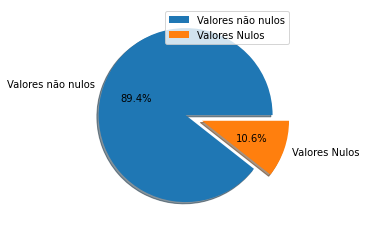

In [9]:
# Representação gráfica da quantidade total de nulls

totalNaN = db.isna().sum().sum()
totalNoNaN = db.notnull().sum().sum()
y = np.array([totalNoNaN,totalNaN])
myexplode = [0,0.2]
labels = ["Valores não nulos","Valores Nulos"]
plt.pie(y, labels=labels, explode=myexplode, shadow=True, autopct='%1.1f%%')
plt.legend()
plt.show();

## Retirando nulos

In [10]:
# Vamos a ver como ficaría a database retirando uma boa parte dos nulls, sem tentar afetar muito ela

db2 = db.copy()
## Vamos a comparar a quantidade de nulos que restam quando vamos retirando os nulos das variaveis mais importantes, vamos uma por uma começando por title.

# mas antes, vamos ver se tem diferença ao dropar aquelas fileiras que todos os registros são nulos
db2.dropna(how='all',inplace=True)
db2.isna().sum()

directions        0
fat            4203
date              0
categories        0
calories       4135
desc           6616
protein        4182
rating           11
title             0
ingredients       0
sodium         4137
dtype: int64

In [11]:
## como deu pra perceber, os registros que tinha nulos na variavel title, tinham nulos em todas as demais variaveis

# Nos não podemos de jeito nenhum preparar um prato sem saber os passos, os ingredientes e nem o nome.
# Db2 representa os pratos que podemos saber cómo preparar, mas que podemos não saber seus valores nutricionais
db2.reset_index(drop=True).head(3)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0


In [12]:
## Infelizmente ainda nesses pratos que sabemos preparar, não temos as informações completas de seus valores nutricionais
# Vamos a criar uma database eliminando as fileiras que presentem 3 de 4 valores (fat,calories,protein,sodium) nulos em seus registros
db3 = db2.copy()

In [13]:
# Primeiro vamos a verificar se tem receitas que tem null em todos seus valores nutricionais.

# Como podemos observar, as receitas que tinham nulos, quase na sua totalidade tinham nulos em todos os seus valores nutricionais
db3.dropna(subset=['fat','calories','protein','sodium'],how='all',inplace=True)
db3.isna().sum()

directions        0
fat              68
date              0
categories        0
calories          0
desc           5333
protein          47
rating            7
title             0
ingredients       0
sodium            2
dtype: int64

In [14]:
# ja que temos a title, ingredients e directions, apesar de que temos valores nulos em desc (descrição), podemos deduzir ou procurar a descrição desse prato em algum outro lugar, entao deixaremos os valores nulls desta variavel

# Conseguimos reducir de 23493 valores nulos a 124 
db3.drop(labels=['desc'],axis=1).isna().sum().sum()

124

In [15]:
# Poderiamos reducir ainda mais os valores nulos utilizando dropna com thresh = 2 
# Mas como dos 3 valores sodium só tem 2, então estaríamos alternando entre reducir fat ou protein, só existiram 2 receitas que se tem 3 valores nutricionais nulls, se poderíam retirar de acordo com as especificações do cliente.
db3.dropna(subset=['fat','protein','sodium'],thresh=2).isna().sum()

directions        0
fat              24
date              0
categories        0
calories          0
desc           5309
protein           3
rating            7
title             0
ingredients       0
sodium            2
dtype: int64

In [16]:
# Deste jeito ficamos com um total de 15976 registros de 20129
db3.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15976 entries, 0 to 15975
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   15976 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         15976 non-null  datetime64[ns, UTC]
 3   categories   15976 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         10643 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       15969 non-null  float64            
 8   title        15976 non-null  object             
 9   ingredients  15976 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.3+ MB


Finalmente vamos a cuidar dos duplicados

In [17]:
# como drop duplicates não pode ser usado com valores do tipo list, vamos a transformar em str

db3 = db3.loc[db3[['directions','categories','ingredients']].astype(str).drop_duplicates().index]

In [18]:
db3.reset_index(drop=True,inplace=True)

In [19]:
db3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14532 entries, 0 to 14531
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   14532 non-null  object             
 1   fat          14479 non-null  float64            
 2   date         14532 non-null  datetime64[ns, UTC]
 3   categories   14532 non-null  object             
 4   calories     14532 non-null  float64            
 5   desc         9620 non-null   object             
 6   protein      14499 non-null  float64            
 7   rating       14526 non-null  float64            
 8   title        14532 non-null  object             
 9   ingredients  14532 non-null  object             
 10  sodium       14531 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.2+ MB


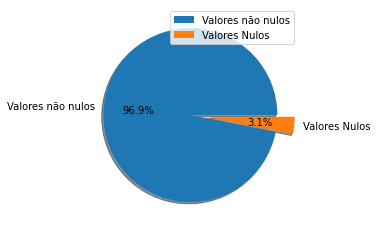

In [20]:
# Vamos a verificar como está a proporção de nulos logo de uma primeira limpeza
# Caso mantenhamos o restante de valores nulos, teremos reducido de 10,6% a 3,1%
totalNaN = db3.isna().sum().sum()
totalNoNaN = db3.notnull().sum().sum()
y = np.array([totalNoNaN,totalNaN])
myexplode = [0,0.2]
labels = ["Valores não nulos","Valores Nulos"]
plt.pie(y, labels=labels, explode=myexplode, shadow=True, autopct='%1.1f%%')
plt.legend()
plt.show();

## Destribuição

In [21]:
## Vamos a utilizar a db limpa, ja que mostrará uma distruição mais limpa e sem ser afetada significativamente por nulls
# Agora como vemos, existem valores máximos muito superiores a aqueles que reseprentam 75% da mostra, e existem valores 0, que sim é possivel ter alimentos com 0 em todas as variaveis 
# nutricionais, só não ao mesmo tempo.

db3.describe().round(2)

# Pelo que podemos ver os valores máximos acima do 75% da mostra estão afetando a desviação standard

,fat,calories,protein,rating,sodium
count,14479.00,14532.00,14499.00,14526.00,14531.00
mean,362.73,6609.49,92.07,3.76,6561.56
std,21336.31,374394.96,3508.24,1.29,348057.46
min,0.00,0.00,0.00,0.00,0.00
25%,8.00,205.00,3.00,3.75,88.00
50%,18.00,345.00,9.00,4.38,304.00
75%,34.00,599.00,28.00,4.38,732.00
max,1722763.00,30111218.00,236489.00,5.00,27675110.00


In [22]:
# Vamos a verificar como sería a diferença caso retirassemos todos os nulls

db3.dropna(how='any').describe().round(2)

# Como podemos ver não a muita diferença, então vamos manter a estrategia aplicada no seção anterior quando trabalhamos os nulls

,fat,calories,protein,rating,sodium
count,9594.00,9594.00,9594.00,9594.00,9594.00
mean,417.28,7707.21,108.22,3.81,7657.34
std,24931.71,438397.35,4135.13,1.25,407415.85
min,0.00,0.00,0.00,0.00,0.00
25%,9.00,214.00,4.00,3.75,109.00
50%,19.00,367.00,10.00,4.38,339.00
75%,36.00,627.00,31.00,4.38,788.75
max,1722763.00,30111218.00,236489.00,5.00,27675110.00


In [23]:
# Como vemos os valores máximos, podemos detectar alguns outliers

db3.sort_values(by=['fat','calories','protein','sodium'],ascending=False).head(10)

# A partir do head 7 vemos uma disparidade muito elevada entre os valores nutricionais
# Não todo outlier, é necesariamente um erro no momento de input, podem ser receitas realmente com altos valores nutricionais e para um grande numero de pessoas.

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
8626,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0
4942,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0
14277,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0
1032,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0
5344,[Position rack in center of oven and preheat t...,186660.0,2004-08-20 04:00:00+00:00,"[Chocolate, Nut, Dessert, Bake, Christmas, Tha...",3358273.0,None,58334.0,3.125,Chocolate-Almond Pie,[4 ounces bittersweet (not unsweetened) or sem...,3449512.0
4020,[Position rack in center of oven and preheat t...,186642.0,2004-08-20 04:00:00+00:00,"[Fruit, Dessert, Bake, Christmas, Thanksgiving...",3358029.0,None,58324.0,3.125,Caramelized Apple and Pear Pie,"[1/2 cup applejack brandy or brandy, 1/2 cup d...",3449373.0
2338,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0
6293,[Prepare grill for direct-heat cooking over me...,2228.0,2009-04-14 04:00:00+00:00,"[Lamb, Mushroom, Mustard, Quick & Easy, Father...",24117.0,"Rubbed all over with a mixture of garlic, fres...",940.0,5.000,Grilled Lamb Chops with Porcini Mustard,"[2 ounces dried porcini mushrooms, 2 cups boil...",4382.0
2582,[Stir flour and allspice in medium bowl to ble...,1818.0,2004-08-20 04:00:00+00:00,"[Beef, Braise, Beef Rib, Red Wine, Fall, Bon A...",19576.0,Tiring of the ultra-refined nouvelle cuisine t...,723.0,3.750,Braised Short Ribs with Red Wine Gravy,"[1/4 cup all-purpose flour, 1 teaspoon (genero...",2950.0
7974,[Put oven racks in upper and lower thirds of o...,1610.0,2004-08-20 04:00:00+00:00,"[Duck, Onion, Poultry, Braise, Roast, Christma...",16761.0,We used chef Fergus Henderson's technique for ...,477.0,4.375,Braised Duck Legs with Shallots and Parsnips,[12 fresh duck legs (7 to 11 lb depending on a...,3097.0


In [24]:
# Mesmo assim, para observar as distribuições e as estatísticas, interfere porque são casos muito isolados (7 em mais de 14mil, menor ao 0.0005%). Então vamos a gerar uma nova database sem
# estes outliers.
db4 = db3.copy()

In [25]:
#db4.sort_values(by=['fat'],ascending=False).head(10)
#db4.sort_values(by=['calories'],ascending=False).head(10)
#db4.sort_values(by=['protein'],ascending=False).head(10)
db4.sort_values(by=['sodium'],ascending=False).head(10)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
8626,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0
4942,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0
14277,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0
2338,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0
5344,[Position rack in center of oven and preheat t...,186660.0,2004-08-20 04:00:00+00:00,"[Chocolate, Nut, Dessert, Bake, Christmas, Tha...",3358273.0,None,58334.0,3.125,Chocolate-Almond Pie,[4 ounces bittersweet (not unsweetened) or sem...,3449512.0
4020,[Position rack in center of oven and preheat t...,186642.0,2004-08-20 04:00:00+00:00,"[Fruit, Dessert, Bake, Christmas, Thanksgiving...",3358029.0,None,58324.0,3.125,Caramelized Apple and Pear Pie,"[1/2 cup applejack brandy or brandy, 1/2 cup d...",3449373.0
1032,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0
2577,[Preheat oven to 400°F. Stir salt and 5 egg wh...,20.0,2007-01-18 04:46:01+00:00,"[Salad, Egg, Fish, Olive, Bake, Roast, Bass, C...",417.0,Roasting the fish in salt makes it very moist ...,53.0,5.000,Whole Branzino Roasted in Salt,"[1 3-pound box coarse kosher salt, 5 (or more)...",132220.0
11966,"[Preheat oven to 400°F. Toss tomatoes, bell pe...",20.0,2004-08-20 04:00:00+00:00,"[Fish, Pepper, Tomato, Appetizer, Bake, Christ...",425.0,"The salt creates a seal around the fish, which...",49.0,4.375,Red Snapper Baked in Salt with Romesco Sauce,"[3 large plum tomatoes, 2 large red bell peppe...",132025.0
8062,"[Preheat oven to 500°F., Bring a 6- to 8-quart...",24.0,2004-08-20 04:00:00+00:00,"[Herb, Bake, Bacon, Oyster, Leek, Spinach, Fal...",443.0,Stitt likes to use rock salt — the kind used f...,29.0,0.000,Baked Oysters with Bacon,"[1/4 cup kosher salt, 2 (10-ounce) bags fresh ...",116178.0


In [26]:
db4 = db4[db4['fat'] < 44198.0]
db4 = db4[db4['calories'] < 3358029.0]
db4 = db4[db4['protein'] < 58324.0]
db4 = db4[db4['protein'] < 3134853.0]

In [27]:
db4.sort_values(by=['sodium'],ascending=False).head(10)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
2577,[Preheat oven to 400°F. Stir salt and 5 egg wh...,20.0,2007-01-18 04:46:01+00:00,"[Salad, Egg, Fish, Olive, Bake, Roast, Bass, C...",417.0,Roasting the fish in salt makes it very moist ...,53.0,5.000,Whole Branzino Roasted in Salt,"[1 3-pound box coarse kosher salt, 5 (or more)...",132220.0
11966,"[Preheat oven to 400°F. Toss tomatoes, bell pe...",20.0,2004-08-20 04:00:00+00:00,"[Fish, Pepper, Tomato, Appetizer, Bake, Christ...",425.0,"The salt creates a seal around the fish, which...",49.0,4.375,Red Snapper Baked in Salt with Romesco Sauce,"[3 large plum tomatoes, 2 large red bell peppe...",132025.0
8062,"[Preheat oven to 500°F., Bring a 6- to 8-quart...",24.0,2004-08-20 04:00:00+00:00,"[Herb, Bake, Bacon, Oyster, Leek, Spinach, Fal...",443.0,Stitt likes to use rock salt — the kind used f...,29.0,0.000,Baked Oysters with Bacon,"[1/4 cup kosher salt, 2 (10-ounce) bags fresh ...",116178.0
426,[Position rack in center of oven; preheat to 4...,38.0,2007-12-03 20:37:19+00:00,"[Fish, Roast, Low Cal, Dinner, Seafood, Salmon...",553.0,Oven-roasting whole fish marries ease of prepa...,48.0,5.000,Whole Fish Baked in Sea Salt,"[2 tablespoons coriander seeds, 1 tablespoon b...",97225.0
8850,"[Preheat oven to 350°F., Toast bread crumbs on...",13.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Mushroom, Shellfish, Appetizer, B...",190.0,Coquilles St.-Jacques,9.0,4.375,Scallops with Mushrooms in White-Wine Sauce,[1/4 cup coarse fresh bread crumbs from a bagu...,90572.0
8394,"[Prepare grill., Shuck corn, reserving largest...",99.0,2004-08-20 04:00:00+00:00,"[Fish, Garlic, Herb, Backyard BBQ, Salmon, Cor...",1210.0,None,43.0,3.750,Grilled Salmon in Corn Husks,"[2 large ears corn, unshucked, 1 stick (1/2 cu...",67909.0
5870,[Preheat oven to 250°F. and line a large bakin...,37.0,2004-08-20 04:00:00+00:00,"[Onion, Side, Fry, Super Bowl, Spice, Hot Pepp...",714.0,None,45.0,3.750,Chipotle Fried Onion Rings,"[1 medium white onion, corn oil for deep-fryin...",67884.0
1154,[Cook bacon in a 2- to 3-quart heavy saucepan ...,128.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Potato, Shellfish, Tomato, Sauté, ...",9811.0,Treat yourself to fresh clams for this recipe ...,1625.0,4.375,Manhattan Clam Chowder,"[2 bacon slices, cut into 1/2-inch squares, 1/...",67615.0
12303,[Place a rack in the center of oven and prehea...,74.0,2014-12-02 04:00:00+00:00,"[Christmas, Dinner, Salmon, Bon Appétit, Sugar...",1234.0,It can be hard to gauge what's happening under...,131.0,3.750,Salt-Baked Salmon with Citrus and Herbs,[1 5–6 pound head-and tail-on salmon or arctic...,67253.0
9859,[Stir 3 gallons water and salt in large pot un...,60.0,2004-11-04 15:38:44+00:00,"[Herb, turkey, Roast, Thanksgiving, Pear, Fall...",1291.0,None,163.0,3.750,Herb-Brined Turkey with Pear Gravy,"[3 gallons water, 1 3-pound box coarse kosher ...",66833.0


In [28]:
db4.describe().round(2)

,fat,calories,protein,rating,sodium
count,14469.00,14469.00,14469.00,14463.00,14468.00
mean,29.48,516.80,22.60,3.76,726.83
std,55.71,865.65,49.57,1.28,3087.42
min,0.00,0.00,0.00,0.00,0.00
25%,8.00,206.00,3.00,3.75,89.00
50%,18.00,346.00,9.00,4.38,306.00
75%,34.00,600.00,28.00,4.38,733.00
max,2228.00,54512.00,2074.00,5.00,132220.00


Histogramas

<AxesSubplot:xlabel='calories', ylabel='Count'>

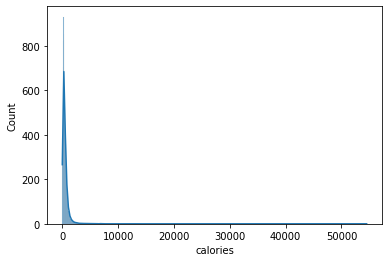

In [29]:
sns.histplot(data=db4,x='calories',kde=True)

<AxesSubplot:xlabel='sodium', ylabel='Count'>

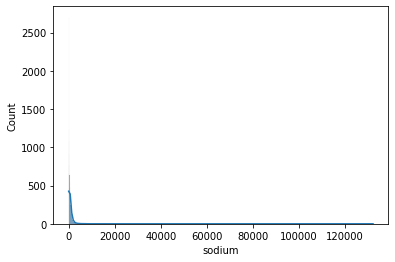

In [30]:
sns.histplot(data=db4,x='sodium',kde=True)

<AxesSubplot:xlabel='protein', ylabel='Count'>

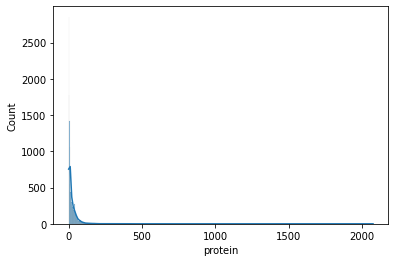

In [31]:
sns.histplot(data=db4,x='protein',kde=True)

<AxesSubplot:xlabel='fat', ylabel='Count'>

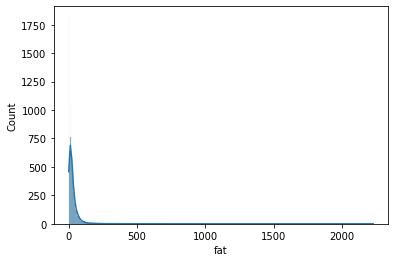

In [32]:
sns.histplot(data=db4,x='fat',kde=True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

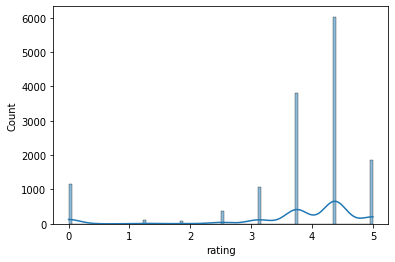

In [33]:
sns.histplot(data=db4,x='rating',kde=True)

Se verificamos a kurtosis e a ksewness podemos ver numericamente os graficos acima, <br>
Os altos valores de kurtosis confirmam a concentração dos valores mais proximamente a 0, que aos valores mais elevados, o que pode nos indicar que: <br>
1: Precisariamos eliminar ainda mais valores máximos<br>
2: Ainda existem muitos outliers<br>
3: Por serem comidas, não existe necesariamente um padrão em seus valores nutricionais

In [34]:
print('Kursotis:', stats.kurtosis(db4['fat']))
print('Skewness:', stats.skew(db4['fat']))

Kursotis: 374.6439849496536
Skewness: 14.336439471103075


In [35]:
print('Kursotis:', stats.kurtosis(db4['calories']))
print('Skewness:', stats.skew(db4['calories']))

Kursotis: 1165.2857883668496
Skewness: 23.67855746359201


In [36]:
print('Kursotis:', stats.kurtosis(db4['sodium']))
print('Skewness:', stats.skew(db4['sodium']))

Kursotis: nan
Skewness: nan


In [37]:
print('Kursotis:', stats.kurtosis(db4['protein']))
print('Skewness:', stats.skew(db4['protein']))

Kursotis: 405.9364224539629
Skewness: 14.905671525316002


## Correlações

Podemos comparar a database original, com outliers e nulls e a database com um numero significativo de outliers e nulls retirados<br>
<br>
Vemos que as relações altamente significativas anteriormente não as mantem mais tao significativas, principalmente quando observamos o Sodium, o que faz bastante sentido lógico, ja que existem muitas comidas que posseem sodio que não tem gordura, por exemplo coca cola zero.

In [38]:
db.corr()

,fat,calories,protein,rating,sodium
fat,1.000000,0.996538,0.712194,0.007235,0.986476
calories,0.996538,1.000000,0.742816,0.007882,0.996392
protein,0.712194,0.742816,1.000000,0.013972,0.749287
rating,0.007235,0.007882,0.013972,1.000000,0.008179
sodium,0.986476,0.996392,0.749287,0.008179,1.000000


In [39]:
db4.corr()

,fat,calories,protein,rating,sodium
fat,1.000000,0.834070,0.592988,0.071474,0.137198
calories,0.834070,1.000000,0.753890,0.060171,0.183737
protein,0.592988,0.753890,1.000000,0.077619,0.315890
rating,0.071474,0.060171,0.077619,1.000000,0.023270
sodium,0.137198,0.183737,0.315890,0.023270,1.000000


In [40]:
import itertools
from sklearn.metrics import confusion_matrix

def make_correlation(df, figsize = (20,10), text_size = 8):
  
  # Creamos matriz de confusion
    cm = df.corr().values
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize = figsize)
    cax = ax.matshow(cm, cmap = plt.cm.Blues)

    # Establecemos labels para las classes
    labels = df.columns

    # Label the axes
    ax.set(title = "Correlation Matrix",
            xticks = np.arange(n_classes),
            yticks = np.arange(n_classes),
            xticklabels = labels, # axes se etiquetarán con nombres de clase (si existen) o enteros
            yticklabels = labels)
  
    # Establecemos x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Ajustas tamaño label
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    fig.autofmt_xdate(rotation=70)


    # Establecemos threshold para diferentes colores
    threshold = (cm.max() + cm.min())/2.

    # Dibujamos el texto en cada celda
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{round(cm[i,j], 2)}%",
             horizontalalignment = "center",
             color = "white" if cm[i, j] > threshold else "black",
             size = text_size)

In [41]:
## Retiramos as variaveis str
db_correlations = db4.drop(labels=['directions','categories','desc','title','ingredients','date'],axis=1)
db_correlations.dtypes

fat         float64
calories    float64
protein     float64
rating      float64
sodium      float64
dtype: object

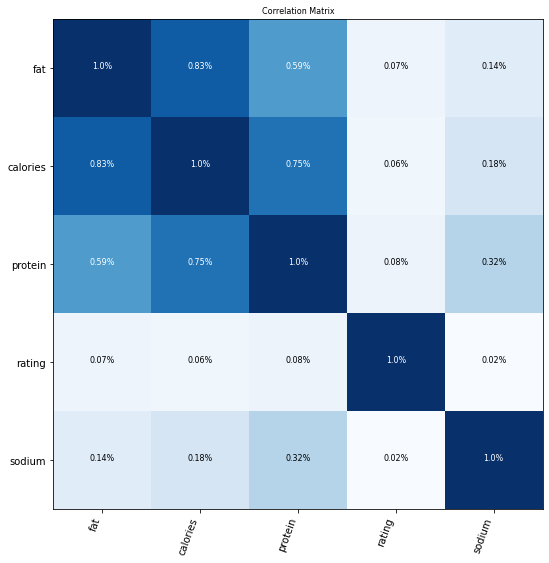

In [42]:
make_correlation(db_correlations)

Ja que a variavel categories não é proporcionadoda de um jeito funcional, poderíamos modifica-la, para que que a gente possa saber as características das categorías con maiores valores nutricionais <br>
<br>
A estrategia sería a seguinte: <br>
Primeiro identificar todas as características dentro das listas que existem na variavel categories (podemos usar regex,ou split())<br>
Depois vamos dividir elas em colunas, nas quais terão valor 0 e 1, sendo 0 que não tem aquela característica o categoria dentro daquele prato, e 1 caso tenha<br>
Logo depois disso, poderíamos fazer todas as operações que a gente quisesse, por exemplo, qual categoría tem maior índice de fat, protein, etc.

In [43]:
#regex pra ler todas as variaveis até  a virgula, e adicionar aquela str numa lista nova.
#limpar aquela lista de palavras repetidas
#transformar a lista em colunas, com valor 0
#fazer um if pra adicionar +1 na coluna se aquela palavra(nome da coluna, por exemplo fish) se encontra na lista do categories daquele registro